In [141]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

import numpy as np
import pandas as pd
from datetime import datetime

pd.options.display.max_columns = 200

import statsmodels.formula.api as smf
import statsmodels.api as sm

## Read in data

In [142]:
big_df = pd.read_csv('20171013111831-SurveyExport.csv', encoding = 'ISO-8859-1')
big_df.head()

,Response ID,Time Started,Date Submitted,Status,Language,Country,Link Name,I consider myself:,WiFi Router:Check all the internet connected devices you currently own:,Laptop computer:Check all the internet connected devices you currently own:,Smart phone:Check all the internet connected devices you currently own:,Smart TV:Check all the internet connected devices you currently own:,Activity Tracker (ex: Fitbit or Apple Watch):Check all the internet connected devices you currently own:,"Smarthome Hub (ex. Amazon Echo, Google Alexa):Check all the internet connected devices you currently own:",Car that connects to the internet:Check all the internet connected devices you currently own:,Smart Thermostat (ex: Nest):Check all the internet connected devices you currently own:,"Smart Appliance (ex. Coffeemaker, Refrigerator, Oven, Fridge):Check all the internet connected devices you currently own:",Smart Door Locks (ex. Door locks for your home you can open via bluetooth):Check all the internet connected devices you currently own:,"Smart Lighting (ex. Connected lighting switches, dimmers, or bulbs):Check all the internet connected devices you currently own:",Thinking about a future in which so much of your world is connected to the internet leaves you feeling:,What are you most excited about as we move toward a more digitally connected future?,What is your biggest fear as we move towards a more connected future?,"Who is most responsible for protecting the online safety, privacy, and security of the connected apps and devices you own?","Who do you most trust to help you learn how to protect your safety, security and privacy online?",Price:YouÛªre planning on buying your next cool new tech toy. Maybe itÛªs a smart TV or a new smartphone. åÊTake a look at the items below and arrange them in order of importance as you make that purchase.,Features:YouÛªre planning on buying your next cool new tech toy. Maybe itÛªs a smart TV or a new smartphone. åÊTake a look at the items below and arrange them in order of importance as you make that purchase.,Safety:YouÛªre planning on buying your next cool new tech toy. Maybe itÛªs a smart TV or a new smartphone. åÊTake a look at the items below and arrange them in order of importance as you make that purchase.,Security:YouÛªre planning on buying your next cool new tech toy. Maybe itÛªs a smart TV or a new smartphone. åÊTake a look at the items below and arrange them in order of importance as you make that purchase.,Privacy:YouÛªre planning on buying your next cool new tech toy. Maybe itÛªs a smart TV or a new smartphone. åÊTake a look at the items below and arrange them in order of importance as you make that purchase.,Reliability:YouÛªre planning on buying your next cool new tech toy. Maybe itÛªs a smart TV or a new smartphone. åÊTake a look at the items below and arrange them in order of importance as you make that purchase.,User Reviews:YouÛªre planning on buying your next cool new tech toy. Maybe itÛªs a smart TV or a new smartphone. åÊTake a look at the items below and arrange them in order of importance as you make that purchase.,Expert Recommendation:YouÛªre planning on buying your next cool new tech toy. Maybe itÛªs a smart TV or a new smartphone. åÊTake a look at the items below and arrange them in order of importance as you make that purchase.,Friend or Family Recommendation:YouÛªre planning on buying your next cool new tech toy. Maybe itÛªs a smart TV or a new smartphone. åÊTake a look at the items below and arrange them in order of importance as you make that purchase.,Convenience:YouÛªre planning on buying your next cool new tech toy. Maybe itÛªs a smart TV or a new smartphone. åÊTake a look at the items below and arrange them in order of importance as you make that purchase.,IoT:Check all the terms below that you could explain to a friend:,Connected Devices:Check all the terms below that you could explain to a friend:,Botnet:Check all the terms below that you could explai

## Quick EDA

### 1. Formulate your question: Compare the answers to question 3 and question 9

<b>Question 3 - Thinking about a future in which so much of your world is connected to the internet leaves you feeling: </b>
- Super excited! I can’t wait for everything to be connected. My life will be so much better.
- Cautiously optimistic. I’m hopeful we’re building a better world by becoming more connected in everything we do.
- On the fence. I’m not sure about all this. I think I’ll wait and see.
- A little wary. All this being connected to the internet in every part of our lives makes me a little nervous. What’s going to happen to our privacy?
- Scared as hell. The future where everything is connected has me scared senseless. We’re all doomed!

<b>Question 9 - Check all the terms below that you could explain to a friend: </b>
- IoT
- Connected Devices
- Botnet
- Blockchain
- RFID
- DDOS
- Zero Day
- VPN
- TOR
- I don’t know what any of these things are

### 2. Read in your data

In [143]:
df = big_df[["Response ID", "Thinking about a future in which so much of your world is connected to the internet leaves you feeling:", "IoT:Check all the terms below that you could explain to a friend:", "Connected Devices:Check all the terms below that you could explain to a friend:", "Botnet:Check all the terms below that you could explain to a friend:", "Blockchain:Check all the terms below that you could explain to a friend:", "RFID:Check all the terms below that you could explain to a friend:","DDOS:Check all the terms below that you could explain to a friend:", "Zero Day:Check all the terms below that you could explain to a friend:", "VPN:Check all the terms below that you could explain to a friend:", "TOR:Check all the terms below that you could explain to a friend:"]]
df.head()

,Response ID,Thinking about a future in which so much of your world is connected to the internet leaves you feeling:,IoT:Check all the terms below that you could explain to a friend:,Connected Devices:Check all the terms below that you could explain to a friend:,Botnet:Check all the terms below that you could explain to a friend:,Blockchain:Check all the terms below that you could explain to a friend:,RFID:Check all the terms below that you could explain to a friend:,DDOS:Check all the terms below that you could explain to a friend:,Zero Day:Check all the terms below that you could explain to a friend:,VPN:Check all the terms below that you could explain to a friend:,TOR:Check all the terms below that you could explain to a friend:
0,1,Scared as hell. The future where everything is...,IoT,Connected Devices,Botnet,NaN,RFID,DDOS,Zero Day,VPN,TOR
1,2,Scared as hell. The future where everything is...,IoT,Connected Devices,Botnet,Blockchain,RFID,DDOS,Zero Day,VPN,TOR
2,3,Cautiously optimistic. IÛªm hopeful weÛªre b...,IoT,Connected Devices,Botnet,NaN,RFID,DDOS,Zero Day,VPN,NaN
3,4,A little wary. All this being connected to the...,IoT,Connected Devices,NaN,Blockchain,NaN,DDOS,NaN,VPN,TOR
4,5,On the fence. IÛªm not sure about all this. ...,IoT,Connected Devices,Botnet,NaN,RFID,DDOS,Zero Day,VPN,TOR


### 3. Check the packaging

In [144]:
df.shape

(192654, 11)

### 4. Look at the top and bottom

In [145]:
df.head()
df.tail()

,Response ID,Thinking about a future in which so much of your world is connected to the internet leaves you feeling:,IoT:Check all the terms below that you could explain to a friend:,Connected Devices:Check all the terms below that you could explain to a friend:,Botnet:Check all the terms below that you could explain to a friend:,Blockchain:Check all the terms below that you could explain to a friend:,RFID:Check all the terms below that you could explain to a friend:,DDOS:Check all the terms below that you could explain to a friend:,Zero Day:Check all the terms below that you could explain to a friend:,VPN:Check all the terms below that you could explain to a friend:,TOR:Check all the terms below that you could explain to a friend:
192649,192651,Cautiously optimistic. IÛªm hopeful weÛªre b...,NaN,Connected Devices,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192650,192652,Cautiously optimistic. IÛªm hopeful weÛªre b...,NaN,Connected Devices,NaN,NaN,RFID,NaN,NaN,VPN,NaN
192651,192653,A little wary. All this being connected to the...,IoT,Connected Devices,Botnet,Blockchain,RFID,NaN,NaN,VPN,TOR
192652,192654,Cautiously optimistic. IÛªm hopeful weÛªre b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192653,192655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 5. Check the n's

In [146]:
print("--- Question 3 ---")
print("# of null values - Thinking about a future...:", df["Thinking about a future in which so much of your world is connected to the internet leaves you feeling:"].isna().sum())
print("")
print("--- Question 9 ---")
print("# of null values - IoT:", df["IoT:Check all the terms below that you could explain to a friend:"].isna().sum())
print("# of null values - Connected devices:", df["Connected Devices:Check all the terms below that you could explain to a friend:"].isna().sum())
print("# of null values - Botnet:", df["Botnet:Check all the terms below that you could explain to a friend:"].isna().sum())
print("# of null values - Blockchain:", df["Blockchain:Check all the terms below that you could explain to a friend:"].isna().sum())
print("# of null values - RFID:", df["RFID:Check all the terms below that you could explain to a friend:"].isna().sum())
print("# of null values - DDOS:", df["DDOS:Check all the terms below that you could explain to a friend:"].isna().sum())
print("# of null values - Zero Day:", df["Zero Day:Check all the terms below that you could explain to a friend:"].isna().sum())
print("# of null values - VPN:", df["VPN:Check all the terms below that you could explain to a friend:"].isna().sum())
print("# of null values - TOR:", df["TOR:Check all the terms below that you could explain to a friend:"].isna().sum())

--- Question 3 ---
# of null values - Thinking about a future...: 13417

--- Question 9 ---
# of null values - IoT: 146451
# of null values - Connected devices: 48842
# of null values - Botnet: 140584
# of null values - Blockchain: 160089
# of null values - RFID: 141692
# of null values - DDOS: 131399
# of null values - Zero Day: 156808
# of null values - VPN: 91043
# of null values - TOR: 122994


## Clear out all null responses to Question 3

In [147]:
df = df[df["Thinking about a future in which so much of your world is connected to the internet leaves you feeling:"].notnull()]

In [148]:
df.isna().sum()

Response ID                                                                                                     0
Thinking about a future in which so much of your world is connected to the internet leaves you feeling:         0
IoT:Check all the terms below that you could explain to a friend:                                          133448
Connected Devices:Check all the terms below that you could explain to a friend:                             36773
Botnet:Check all the terms below that you could explain to a friend:                                       127604
Blockchain:Check all the terms below that you could explain to a friend:                                   146991
RFID:Check all the terms below that you could explain to a friend:                                         128686
DDOS:Check all the terms below that you could explain to a friend:                                         118475
Zero Day:Check all the terms below that you could explain to a friend:                  

## Clear out all rows that didn't answer Question 9

In [149]:
df["Question 9: # of Missing Values"] = df.isnull().sum(axis = 1)

In [150]:
df = df[df["Question 9: # of Missing Values"] != 9]

In [151]:
len(df)

153094

### Play with the data

In [152]:
df["Question 9: # of Missing Values"].value_counts()

8    39514
7    23518
6    18935
5    16281
4    13529
0    12966
3    10849
2     9139
1     8363
Name: Question 9: # of Missing Values, dtype: int64

In [153]:
df["Question 9: # of Terms Checked"] = df["Question 9: # of Missing Values"]

In [154]:
df["Question 9: # of Terms Checked"] = df["Question 9: # of Terms Checked"].replace([0, 1, 2, 3, 4, 5, 6, 7, 8], [8, 7, 6, 5, 4, 3, 2, 1, 0])
df["Question 9: # of Terms Checked"].value_counts()

0    39514
1    23518
2    18935
3    16281
4    13529
8    12966
5    10849
6     9139
7     8363
Name: Question 9: # of Terms Checked, dtype: int64

In [157]:
agg_d = {"Question 9: # of Terms Checked": np.mean}
nine_gb = df.groupby("Thinking about a future in which so much of your world is connected to the internet leaves you feeling:")
nine_agg = nine_gb.agg(agg_d)
nine_agg

,Question 9: # of Terms Checked
Thinking about a future in which so much of your world is connected to the internet leaves you feeling:,
A little wary. All this being connected to the internet in every part of our lives makes me a little nervous. WhatÛªs going to happen to our privacy?,2.758427
Cautiously optimistic. IÛªm hopeful weÛªre building a better world by becoming more connected in everything we do.,3.008494
On the fence. IÛªm not sure about all this. I think IÛªll wait and see.,2.441280
Scared as hell. The future where everything is connected has me scared senseless. WeÛªre all doomed!,3.134913
Super excited! I canÛªt wait for everything to be connected. My life will be so much better.,3.231070


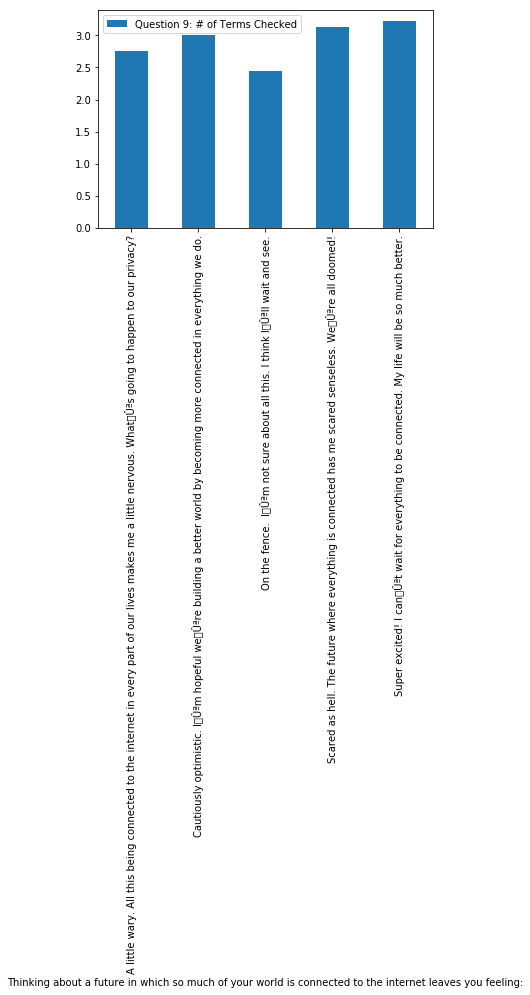

In [159]:
nine_agg.plot(kind = 'bar')

## Convert nine_agg to csv for D3

In [161]:
nine_agg.to_csv("mozilla_df_infovis.csv")